In [1]:
# Data Mining project 1
# Regression problem
# Used car price predictions

In [2]:
import pandas as pd

train_df = pd.read_csv("used_car_train.csv")
test_df = pd.read_csv("used_car_question.csv")

test_ids = test_df["id"]

In [3]:
# basic info
print("training info:")
train_df.info()
print("\ntest info:")
test_df.info()

training info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850000 entries, 0 to 849999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       850000 non-null  int64 
 1   Price    850000 non-null  int64 
 2   Year     850000 non-null  int64 
 3   Mileage  850000 non-null  int64 
 4   City     850000 non-null  object
 5   State    850000 non-null  object
 6   Make     850000 non-null  object
 7   Model    850000 non-null  object
dtypes: int64(4), object(4)
memory usage: 51.9+ MB

test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       2122 non-null   int64  
 1   Price    0 non-null      float64
 2   Year     2122 non-null   int64  
 3   Mileage  2122 non-null   int64  
 4   City     2122 non-null   object 
 5   State    2122 non-null   object 
 6   Make     2122 non

In [4]:
train_df.head()

,id,Price,Year,Mileage,City,State,Make,Model
0,1,41285,2017,13336,El Cajon,CA,BMW,X3sDrive28i
1,2,8986,2009,56652,Southborogh,MA,Toyota,Corolla4dr
2,3,17477,2017,21265,Fort Worth,TX,Kia,OptimaLX
3,4,27000,2017,5180,Modesto,CA,Nissan,370ZCoupe
4,5,27888,2014,46885,Lauderdale Lakes,FL,BMW,5


In [5]:
# duplicate check
print("training duplicates: ", train_df.duplicated().sum())
print("testing duplicates: ", test_df.duplicated().sum())

# summary
print("training summary: \n", train_df.describe())

training duplicates:  0
testing duplicates:  0
training summary: 
                   id          Price           Year       Mileage
count  850000.000000  850000.000000  850000.000000  8.500000e+05
mean   425000.500000   21463.812309    2013.288996  5.250844e+04
std    245374.008744   13596.442092       3.415259  4.199198e+04
min         1.000000    1500.000000    1997.000000  5.000000e+00
25%    212500.750000   13000.000000    2012.000000  2.383600e+04
50%    425000.500000   18500.000000    2014.000000  4.025700e+04
75%    637500.250000   26995.000000    2016.000000  7.218800e+04
max    850000.000000  499500.000000    2018.000000  2.856196e+06


In [6]:
# check for number of unique values
print("Make:", train_df["Make"].nunique())
print("Model:", train_df["Model"].nunique())
print("City:", train_df["City"].nunique())
print("State:", train_df["State"].nunique())

Make: 58
Model: 2734
City: 2553
State: 59


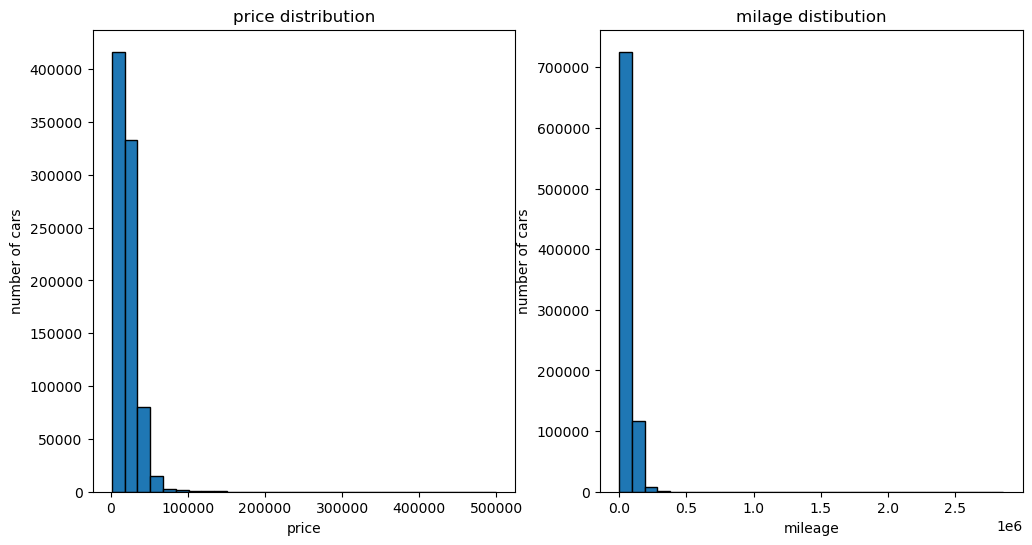

In [7]:
import matplotlib.pyplot as plt
# (initial) visulization of distributions
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(train_df["Price"], bins=30, edgecolor='black')
plt.title("price distribution")
plt.xlabel("price")
plt.ylabel("number of cars")
plt.subplot(1, 2, 2)
plt.hist(train_df["Mileage"], bins=30, edgecolor='black')
plt.title("milage distibution")
plt.xlabel("mileage")
plt.ylabel("number of cars")
plt.show()
# the graphs come out with a skewed distributiuon - need to do log transformation to handle outliers

In [8]:
# need to encode categorical variables like model, city, state
# merge both datasets (feature columns) into a single DataFrame
# add a source column to seperate them later

import numpy as np
# add source column before combining
train_df["source"] = "train"
test_df["source"] = "test"

# add placeholder price to test set
test_df["Price"] = np.nan

# 04/03 addition - mileage / year feature
# Prevent division by zero before creating mileage per year feature
# [note: didnt improve score]
#train_df.loc[train_df["Year"] == 2025, "Year"] = 2024
#test_df.loc[test_df["Year"] == 2025, "Year"] = 2024
#train_df["Mileage_per_Year"] = train_df["Mileage"] / (2025 - train_df["Year"])
#test_df["Mileage_per_Year"] = test_df["Mileage"] / (2025 - test_df["Year"])

# combine for consistency
combined_df = pd.concat([train_df, test_df], ignore_index=True)

In [9]:
# encode categorical colums
# there are too many rows in model and city for one-hot encoding (runs into memory issues)
# use frequency encoding for these, adn OHE for make and state
combined_df["Model_freq"] = combined_df["Model"].map(combined_df["Model"].value_counts())
combined_df["City_freq"] = combined_df["City"].map(combined_df["City"].value_counts())

# one-hot encode low-card features: Make and State
combined_df = pd.get_dummies(combined_df, columns=["Make", "State"], drop_first=True)

# drop original Model and City columns
combined_df.drop(columns=["Model", "City"], inplace=True)

In [10]:
# split back into train and test sets
train_df = combined_df[combined_df["source"] == "train"].drop(columns=["source"])
test_df = combined_df[combined_df["source"] == "test"].drop(columns=["source", "Price"])

In [11]:
# BEFORE preprocessing should reduce noise in the data
# aka outlier handling - should improve accuracy
# use log transformation for price (feature we're trying to predict

train_df["Price"] = np.log1p(train_df["Price"])

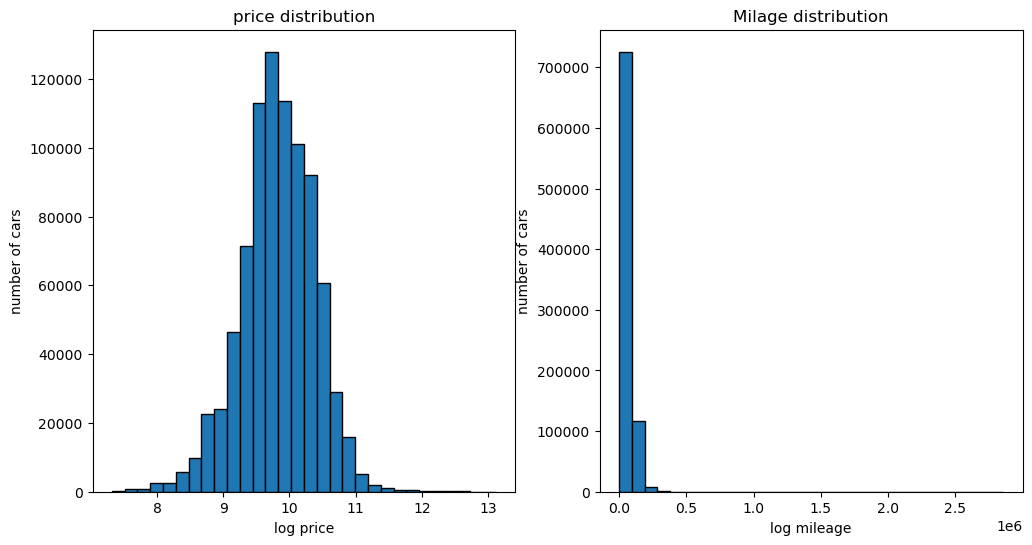

In [12]:
# visualize the log distibutions (using histogram)
# now with the log transformation the histograms have a much clearner distrobution
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(train_df["Price"], bins=30, edgecolor='black')
plt.title("price distribution")
plt.xlabel("log price")
plt.ylabel("number of cars")
plt.subplot(1, 2, 2)
plt.hist(train_df["Mileage"], bins=30, edgecolor='black')
plt.title("Milage distribution")
plt.xlabel("log mileage")
plt.ylabel("number of cars")
plt.show()

In [13]:
# data preprocessing next:
# check for missing values

print("training data missing values:\n", train_df.isnull().sum())
print("testing data missing values:\n", test_df.isnull().sum())
# only values missing are in testing data under price - to be expected  

training data missing values:
 id            0
Price         0
Year          0
Mileage       0
Model_freq    0
             ..
State_ WA     0
State_ WI     0
State_ WV     0
State_ WY     0
State_ ga     0
Length: 121, dtype: int64
testing data missing values:
 id            0
Year          0
Mileage       0
Model_freq    0
City_freq     0
             ..
State_ WA     0
State_ WI     0
State_ WV     0
State_ WY     0
State_ ga     0
Length: 120, dtype: int64


In [14]:
# original attempt at onehotencoding
# now handled in combined_df

#from sklearn.preprocessing import OneHotEncoder

#categorical_features = ["Make", "Model", "City", "State"]
# one hot encoding

#ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#ohe_features = ohe.fit_transform(train_df[["Make", "State"]])
# = ohe.get_feature_names_out(["Make", "State"])
#encoded_df = pd.DataFrame(ohe_features, columns=ohe_columns)
#train_df = train_df.join(encoded_df).drop(["Make", "State"], axis=1)

# frequency encoding
#train_df["Model_freq"] = train_df["Model"].map(train_df["Model"].value_counts())
#train_df["City_freq"] = train_df["City"].map(train_df["City"].value_counts())

# drop the pre-transform 'Model' and 'City' columns
#train_df.drop(["Model", "City"], axis=1, inplace=True)

#print(train_df.head())

In [15]:
# check for feature correlations
# highly correlated: can lead to overfitting
# trying to avoid multicollinearity also

corr_matrix = train_df.drop(columns=["Price"]).corr()
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

# remove the highlt correlated features (above .85 threshold)
threshold = 0.85
highly_correlated_features = set()
for (col1, col2), value in corr_pairs.items():
   if col1 != col2 and value > threshold:
       # keep it if the column is Mileage_per_Year
        if col2 != "Mileage_per_Year":
            highly_correlated_features.add(col2)

train_df.drop(columns=highly_correlated_features, inplace=True)
test_df.drop(columns=highly_correlated_features, inplace=True)

print(train_df.head())

   id      Price  Year  Mileage  Model_freq  City_freq  Make_Acura  Make_Alfa  \
0   1  10.628279  2017    13336         397       1794       False      False   
1   2   9.103534  2009    56652        2216         39       False      False   
2   3   9.768698  2017    21265        3357       2675       False      False   
3   4  10.203629  2017     5180         584        701       False      False   
4   5  10.235988  2014    46885        5348        468       False      False   

   Make_Aston  Make_Audi  ...  State_ TX  State_ UT  State_ VA  State_ VT  \
0       False      False  ...      False      False      False      False   
1       False      False  ...      False      False      False      False   
2       False      False  ...       True      False      False      False   
3       False      False  ...      False      False      False      False   
4       False      False  ...      False      False      False      False   

   State_ Va  State_ WA  State_ WI  State_ WV  Sta

In [16]:
# now ready to train the model
# a random forest regression model would work well for this problem for a few reasons
# this is not a linear problem, and there are many variables that will afect the prediction
# random forest handles outliers well
# random forest is good for one hot encoding with mixed data types
# fast processing with a relatively large dataset

In [17]:
from sklearn.model_selection import train_test_split

# split data into train and test
X = train_df.drop(columns=["id", "Price"])
y = train_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(X_test.shape)

(680000, 119)
(170000, 119)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# random forest init and model fitting
# initial testing with n_estimators = 50 gives rmse ~0.164
# best score so far: 4891 with (n_estimators=300, max_depth=40, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', random_state=42, n_jobs=-1)
model = RandomForestRegressor(n_estimators=200, max_depth=50, min_samples_split=4, min_samples_leaf=1, max_features='sqrt', random_state=1234, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_split=4,
                      n_estimators=200, n_jobs=-1, random_state=1234)

In [19]:
# predictions
#y_pred = model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)

#print("Initial RMSE: ", rmse)

In [20]:
# actual vs. predicted prices (scatter plot)
#plt.figure(figsize=(16,12))
#plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', s=10, c=y_pred)
#plt.xlabel("Actual price")
#plt.ylabel("Predicted price")
#plt.title("actual prices vs predicted prices")
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
#plt.show()

In [21]:
# calculate feature importance to help with testing
# by reducing noise and weighing more relevant features more strongly

# init feature labels and importance
feature_names = X.columns
importances = model.feature_importances_
# sort
feature_importances = np.argsort(importances)[::-1]

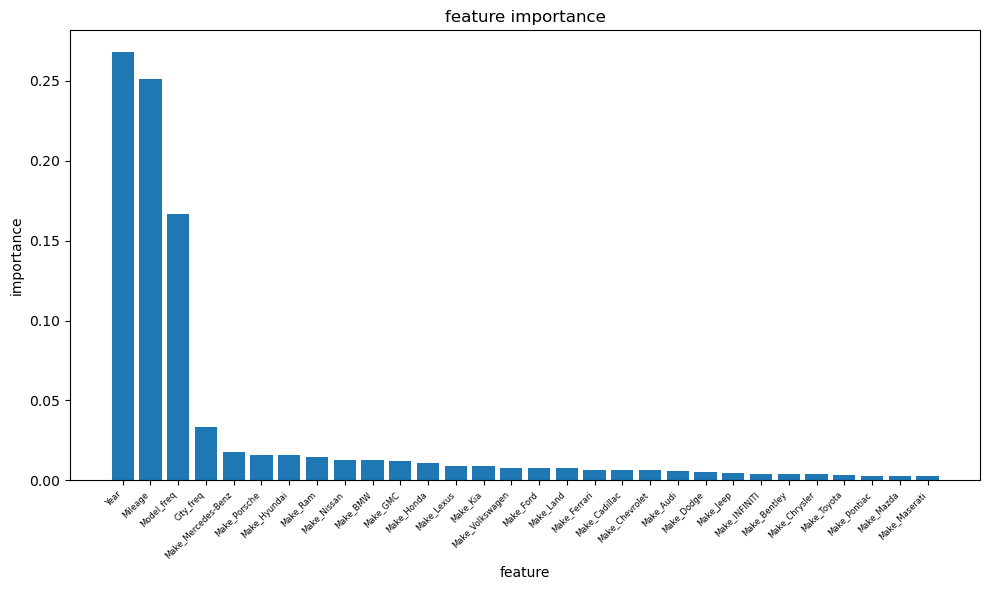

In [22]:
# bar chart to compare features
top = 30
top_features = feature_importances[:top]# (only showing the top 30 bc they get too clumped up otherwise)

plt.figure(figsize=(10,6))
plt.bar(range(top), importances[top_features], align='center')
plt.xticks(range(top), feature_names[top_features], rotation=45, ha='right', fontsize=6)
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature importance")
plt.tight_layout()
plt.show()

# mileage, model, and year are clearly vastly the most important features

In [23]:
# remove lowest-importance features
low_importance_threshold = 10
bottom_features = feature_importances[-low_importance_threshold:]
low_feature_names = feature_names[bottom_features]

X = X.drop(columns=low_feature_names)
X_test = X_test.drop(columns=low_feature_names)

In [24]:
# re-split after selecting features
X_train, X_val, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_split=4,
                      n_estimators=200, n_jobs=-1, random_state=1234)

In [25]:
# Chaoping suggestion: use multiple models and combine predictions of both models
# attempted with decision tree first - it didnt improve results
# Tried with K-Nearest Neighbor and it was extremely slow. found out might not be best for this data set
# Attempt #3 with gradient boosting (the histogram version is much faster allows use of multiple cores)
# Gradient boosting definitely performs the best!
from sklearn.ensemble import HistGradientBoostingRegressor

gb_model = HistGradientBoostingRegressor(max_iter=400, learning_rate=0.2, max_depth=32, random_state=1234)

In [26]:
gb_model.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.2, max_depth=32, max_iter=400,
                              random_state=1234)

In [27]:
# gradient boost prediction
gb_pred = gb_model.predict(X_val)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
print("RMSE (gradient boosting):", gb_rmse)

RMSE (gradient boosting): 0.17383963328956384


In [28]:
# random forest prediction
y_pred = model.predict(X_val)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (random forest):", rmse)

RMSE (random forest): 0.21826193749860068


In [29]:

X_test = test_df[X.columns] # keep feature order the same (transformations made earlier)

In [30]:
rf_test_pred = model.predict(X_test)
gb_test_pred = gb_model.predict(X_test)

In [43]:
# combine the predictions (starting weight: 70% RF, 30% GB)

final_pred = 0.15 * rf_test_pred + 0.85 * gb_test_pred
final_pred = np.expm1(final_pred) # undo log1p

In [44]:
# actual vs. predicted prices (scatter plot)
#plt.figure(figsize=(16,12))
#plt.scatter(y_test, final_pred, alpha=0.5, edgecolors='k', s=10, c=final_pred)
#plt.xlabel("Actual price")
#plt.ylabel("Predicted price")
#plt.title("actual prices vs predicted prices")
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
#plt.show()

In [45]:
submission = pd.DataFrame({
    "id": test_ids,
    "Price": final_pred
})
submission.to_csv("predicted_used_car_prices.csv", index=False)